In [1]:
%matplotlib inline

import collections
import gc
import pathlib
import random
import re
import time
import warnings

import cv2
import fastai
import fastai.vision
import h5py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import PIL
import png
import torch
import torch.nn.functional as F
import tqdm

path = pathlib.Path('/mnt/data1/smc_data/challenge2')
path2 = pathlib.Path('/home/jin/sandbox/smc_challenge2/images')

`energy_keV`, `y_dirs`, `z_dirs`, `semi_angles_rad`, `d_hkls_angstrom` are parameters specific to how the CBED was simulated

In [16]:
list((img_path/'train/').ls()[:10])

[PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/40_sample_14_3.216.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/22_sample_23_7.150.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/88_sample_8_4.139.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/9_sample_19_8.221.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/260_sample_8_9.146.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/140_sample_20_1.221.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/368_sample_41_1.12.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/277_sample_12_1.225.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/274_sample_22_4.41.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img8/train/158_sample_33_8.59.png')]

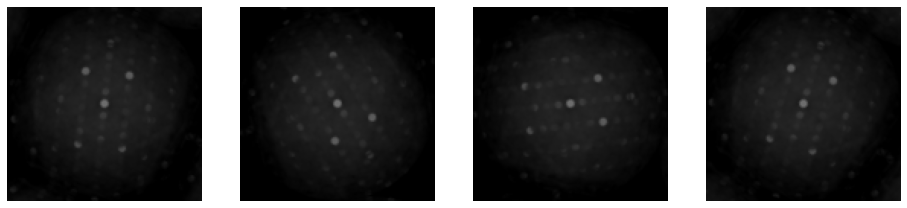

In [110]:
def get_ex(filename):
    return fastai.vision.open_image(filename)

def plots_f(rows, cols, width, height, **kwargs):
    filenames = (img_path/'train/').ls()
    for filename, _ in zip(filenames, range(2)):
        pass
    
    [get_ex(str(filename)).apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

@fastai.vision.image.TfmPixel
def my_flip_lr(x, part):
    _, height, width = x.shape
    assert width == 3 * height
    side = height
    
    start = part*side
    end = (part+1)*side
    
    y = x.clone()
    y[:,:,start:end] = x[:, :, start:end].flip(2)
    
    return y
    
tfms = [
    [
        fastai.vision.transform.rotate(p=1., degrees=(0., 360.)),
        # my_flip_lr(p=0.5, part=0),
        # my_flip_lr(p=0.5, part=1),
        # my_flip_lr(p=0.5, part=2),
    ],
    []
]
    
plots_f(1, 4, 16, 9)

In [59]:
img_path = path2/'img8'

tfms = [
    [
        my_flip_lr(p=0.5, part=0),
        # my_flip_lr(p=0.5, part=1),
        # my_flip_lr(p=0.5, part=2),
    ],
    []
]

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)    
    
    data2 = (
        fastai.vision.ImageList.from_folder(img_path, extensions='.png')
        .split_by_folder(train='train', valid='valid')
        .label_from_re(r'.*\.(\d{1,3})\.png$')
        .transform(tfms)
        .databunch(
            bs=200,
        )
    )

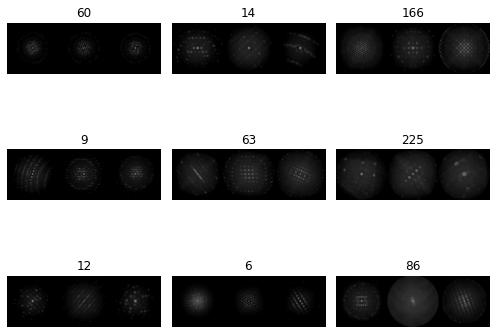

In [60]:
data2.show_batch(rows=3, figsize=(7,6))

In [61]:
learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


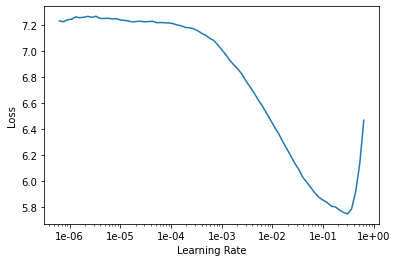

In [7]:
learn2.lr_find()
learn2.recorder.plot()

In [62]:
learn2.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.042271,3.250635,0.726274,0.273725,0.550000,06:25
1,2.142834,2.914608,0.663529,0.336471,0.616471,06:25
2,1.754905,2.813595,0.635980,0.364020,0.643186,06:22
3,1.509880,2.745971,0.622206,0.377794,0.661127,06:22
4,1.394164,2.748686,0.616275,0.383725,0.660784,06:24


In [66]:
img_path = path2/'img8'

tfms = [
    [
        # my_flip_lr(p=0.5, part=0),
        my_flip_lr(p=0.5, part=1),
        # my_flip_lr(p=0.5, part=2),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=200,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

learn2.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.022995,3.191983,0.733627,0.266373,0.558922,06:22
1,2.135765,2.844707,0.666225,0.333775,0.623676,06:22
2,1.733330,2.720558,0.628137,0.371863,0.653382,06:24
3,1.510042,2.682756,0.610343,0.389657,0.660147,06:25
4,1.424950,2.697083,0.606373,0.393627,0.663578,06:23


In [63]:
img_path = path2/'img8'

tfms = [
    [
        # my_flip_lr(p=0.5, part=0),
        # my_flip_lr(p=0.5, part=1),
        my_flip_lr(p=0.5, part=2),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=200,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

learn2.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.028440,3.177325,0.724314,0.275686,0.560147,06:20
1,2.121098,2.852091,0.671716,0.328284,0.620441,06:20
2,1.737029,2.752006,0.631520,0.368480,0.646078,06:20
3,1.502789,2.738653,0.616520,0.383480,0.662304,06:21
4,1.393581,2.730922,0.617402,0.382598,0.663431,06:20


In [64]:
img_path = path2/'img8'

tfms = [
    [
        my_flip_lr(p=0.5, part=0),
        my_flip_lr(p=0.5, part=1),
        my_flip_lr(p=0.5, part=2),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=200,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

learn2.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.719766,3.741480,0.766275,0.233725,0.497843,06:26
1,2.538669,3.054646,0.699363,0.300637,0.584510,06:24
2,2.036150,2.867573,0.659216,0.340784,0.627059,06:28
3,1.714542,2.741207,0.640980,0.359020,0.651520,06:32
4,1.522478,2.722927,0.614069,0.385931,0.657500,06:24
5,1.365542,2.727301,0.605294,0.394706,0.666863,06:26
6,1.231972,2.720934,0.595441,0.404559,0.669755,06:25
7,1.143926,2.730895,0.584559,0.415441,0.673480,06:25
8,1.076331,2.710148,0.584363,0.415637,0.676078,06:25
9,1.067251,2.713843,0.581275,0.418725,0.675098,06:25


In [65]:
learn2.save('8_flip3')

In [67]:
img_path = path2/'img9'

tfms = [
    [
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=500,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

learn2.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.733970,3.789916,0.810163,0.189837,0.450833,06:27
1,2.967867,3.363662,0.765392,0.234608,0.504820,06:26
2,2.674865,3.248632,0.742435,0.257565,0.527647,06:26
3,2.467661,3.150127,0.721176,0.278824,0.554248,06:26
4,2.330255,3.127071,0.712124,0.287876,0.562958,06:26
5,2.230124,3.082720,0.703039,0.296961,0.571699,06:27
6,2.129582,3.093877,0.697239,0.302761,0.576765,06:26
7,2.086065,3.066372,0.690212,0.309788,0.582108,06:27
8,2.040075,3.078299,0.689085,0.310915,0.581846,06:27
9,2.009238,3.073043,0.689265,0.310735,0.582026,06:28


In [68]:
learn2.save('9_base')

In [72]:
learn2.load('9_base')
None

In [73]:
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [74]:
data2.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f9bdb679ef0>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f9d63c2aae8>)

In [77]:
data2.valid_ds

LabelList (61200 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
198,2,88,141,14
Path: /home/jin/sandbox/smc_challenge2/images/img9

In [84]:
for x in data2.valid_ds[:5]:
    print(x[0])

Image (3, 128, 128)
Image (3, 128, 128)
Image (3, 128, 128)
Image (3, 128, 128)
Image (3, 128, 128)


In [91]:
img = x[0]

In [92]:
type(img)

fastai.vision.image.Image

In [90]:
data2.valid_ds.predict?

Signature: data2.valid_ds.predict(res)
Docstring: Delegates predict call on `res` to `self.y`.
File:      ~/sandbox/fastai/env3/lib/python3.7/site-packages/fastai/data_block.py
Type:      method


In [98]:
y = x[0]._px[None].cuda()

In [101]:
learn2.model(y)

tensor([[ 4.2899e+00, -4.5598e-06, -7.1513e+00, -2.7153e+00, -9.1050e+00,
         -9.5538e+00, -9.0343e+00, -3.2971e+00, -5.2825e+00, -6.8624e+00,
          4.3423e+00, -9.6984e+00, -8.7886e+00, -9.3928e+00, -3.2850e+00,
         -6.0939e+00, -7.7769e+00, -7.5983e+00, -5.6344e+00, -4.1174e+00,
          3.7156e+00, -9.3625e+00, -1.2030e+00, -5.8873e-01, -4.2661e+00,
         -7.4241e+00, -6.7199e+00, -8.3121e+00, -2.9901e+00, -3.7934e+00,
         -4.3251e+00,  1.9362e+00, -5.4775e+00, -5.2786e+00, -8.4922e+00,
         -1.0426e+01, -7.3185e+00, -7.2617e+00, -2.4393e+00, -5.3458e+00,
         -6.9318e+00, -1.5472e+00,  5.8129e+00,  7.1829e-02, -2.1571e+00,
         -1.0322e+00, -5.0666e+00, -4.3319e+00, -2.5627e+00,  2.9589e-01,
         -4.2561e+00,  1.6778e+00, -6.7950e+00,  3.1647e+00, -4.5652e+00,
         -2.5288e+00, -6.2588e+00, -1.6647e+00, -4.6000e+00, -3.6063e+00,
         -4.0845e+00, -4.1638e+00, -1.1750e+01, -2.2818e+00, -1.9501e+00,
         -2.2465e+00, -6.0854e+00, -1.

In [102]:
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [69]:
img_path = path2/'img9'

tfms = [
    [
        fastai.vision.transform.flip_lr(p=0.5),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=500,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

learn2.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.791387,3.805688,0.809526,0.190474,0.445294,06:21
1,3.020891,3.375094,0.771650,0.228350,0.498480,06:23
2,2.729929,3.269921,0.748905,0.251095,0.522010,06:22
3,2.559748,3.191741,0.732859,0.267141,0.541389,06:22
4,2.427655,3.179316,0.721683,0.278317,0.550539,06:22
5,2.347996,3.143248,0.710850,0.289150,0.558268,06:21
6,2.264302,3.135540,0.705278,0.294722,0.563186,06:24
7,2.204635,3.121639,0.702108,0.297892,0.567386,06:24
8,2.181030,3.118351,0.700523,0.299477,0.567614,06:25
9,2.170993,3.119672,0.698644,0.301356,0.568464,06:30


In [70]:
learn2.save('9_flip')

In [11]:
learn2.load('1')
None

In [12]:
learn2.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


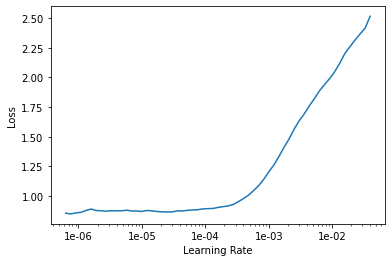

In [13]:
learn2.lr_find()
learn2.recorder.plot()

In [14]:
learn2.fit_one_cycle(15, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.889199,2.730753,0.567451,0.432549,0.681765,08:22
1,0.846991,2.719450,0.565294,0.434706,0.681912,08:20
2,0.796711,2.727200,0.559020,0.440980,0.685392,08:18
3,0.706414,2.694100,0.548088,0.451912,0.690833,08:24
4,0.630528,2.709214,0.542941,0.457059,0.691373,08:19
5,0.537645,2.718201,0.542108,0.457892,0.694755,08:23
6,0.473041,2.765515,0.536274,0.463725,0.692549,08:26
7,0.424554,2.811000,0.532990,0.467010,0.691667,08:21
8,0.369543,2.836517,0.530294,0.469706,0.693186,08:18
9,0.345730,2.846496,0.531274,0.468726,0.692598,08:21


In [94]:
learn2.save('3')

In [150]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    learn2.fit_one_cycle(5, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.536842,3.526865,0.625626,04:25
1,0.509732,3.463931,0.621699,04:26
2,0.480105,3.602595,0.623220,04:26
3,0.433840,3.576636,0.619244,04:26
4,0.435637,3.587420,0.619342,04:28


In [96]:
learn2.save('4')

In [151]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    learn2.fit_one_cycle(5, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.423782,3.586152,0.620275,04:26
1,0.404474,3.589461,0.622239,04:27
2,0.380627,3.653838,0.618262,04:32
3,0.351382,3.646508,0.616151,04:26
4,0.336255,3.628783,0.615758,04:27


In [98]:
learn2.save('5')

In [99]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    learn2.fit_one_cycle(5, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.184552,4.036399,0.646784,04:31
1,0.180685,4.101031,0.645312,04:32
2,0.158005,4.095624,0.643986,04:32
3,0.137824,4.099963,0.642219,04:32
4,0.121260,4.098276,0.642808,04:31


In [100]:
learn2.save('6')

In [101]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    learn2.fit_one_cycle(5, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.139702,4.136061,0.641630,04:32
1,0.132621,4.191683,0.644919,04:32
2,0.117125,4.259325,0.644870,04:31
3,0.102476,4.257316,0.642268,04:34
4,0.093843,4.247420,0.643544,04:32


In [7]:
interp = fastai.vision.ClassificationInterpretation.from_learner(learn2)

In [8]:
learn2.validate(data2.valid_dl)

[3.1945121, tensor(0.6799), tensor(0.3201), tensor(0.5888)]

In [28]:
learn2.validate(metrics=learn2.metrics + [my_metric])

[3.1945121, tensor(0.6799), tensor(0.3201), tensor(0.5888), tensor(0.3201)]

In [32]:
metrics = learn2.metrics + [my_metric]

cb_handler = fastai.basic_train.CallbackHandler(learn2.callbacks, metrics)
cb_handler.on_train_begin(1, None, metrics)
cb_handler.on_epoch_begin()

val_metrics = fastai.basic_train.validate(
    learn2.model,
    learn2.data.valid_dl,
    learn2.loss_func,
    cb_handler)

cb_handler.on_epoch_end(val_metrics)
cb_handler.state_dict['last_metrics']

3.1945121

In [82]:
xb.shape

torch.Size([500, 3, 128, 128])

In [88]:
xb.mean(dim=(1,2,3)).min()

tensor(0.0025, device='cuda:0')

In [100]:
xb.min()

tensor(0., device='cuda:0')

In [37]:
ds = learn2.data.single_ds

In [38]:
ds.y.analyze_pred?

Signature: ds.y.analyze_pred(pred, thresh: float = 0.5)
Docstring: Called on `pred` before `reconstruct` for additional preprocessing.
File:      ~/sandbox/fastai/env3/lib/python3.7/site-packages/fastai/data_block.py
Type:      method


In [33]:
cb_handler.on_epoch_end(3.1945121)
cb_handler.state_dict['last_metrics']

[3.1945121, tensor(0.6799), tensor(0.3201), tensor(0.5888), tensor(0.3201)]

In [27]:
def my_metric(input_t, targs):
    n = targs.shape[0]
    input_t = input_t.argmax(dim=-1).view(n,-1)
    targs = targs.view(n, -1)
    return (input_t==targs).float().mean()

In [17]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [18]:
torch.tensor([1,2,3]).view(3, -1)

tensor([[1],
        [2],
        [3]])

In [8]:
losses,idxs = interp.top_losses()

len(data2.valid_ds)==len(losses)==len(idxs)

True

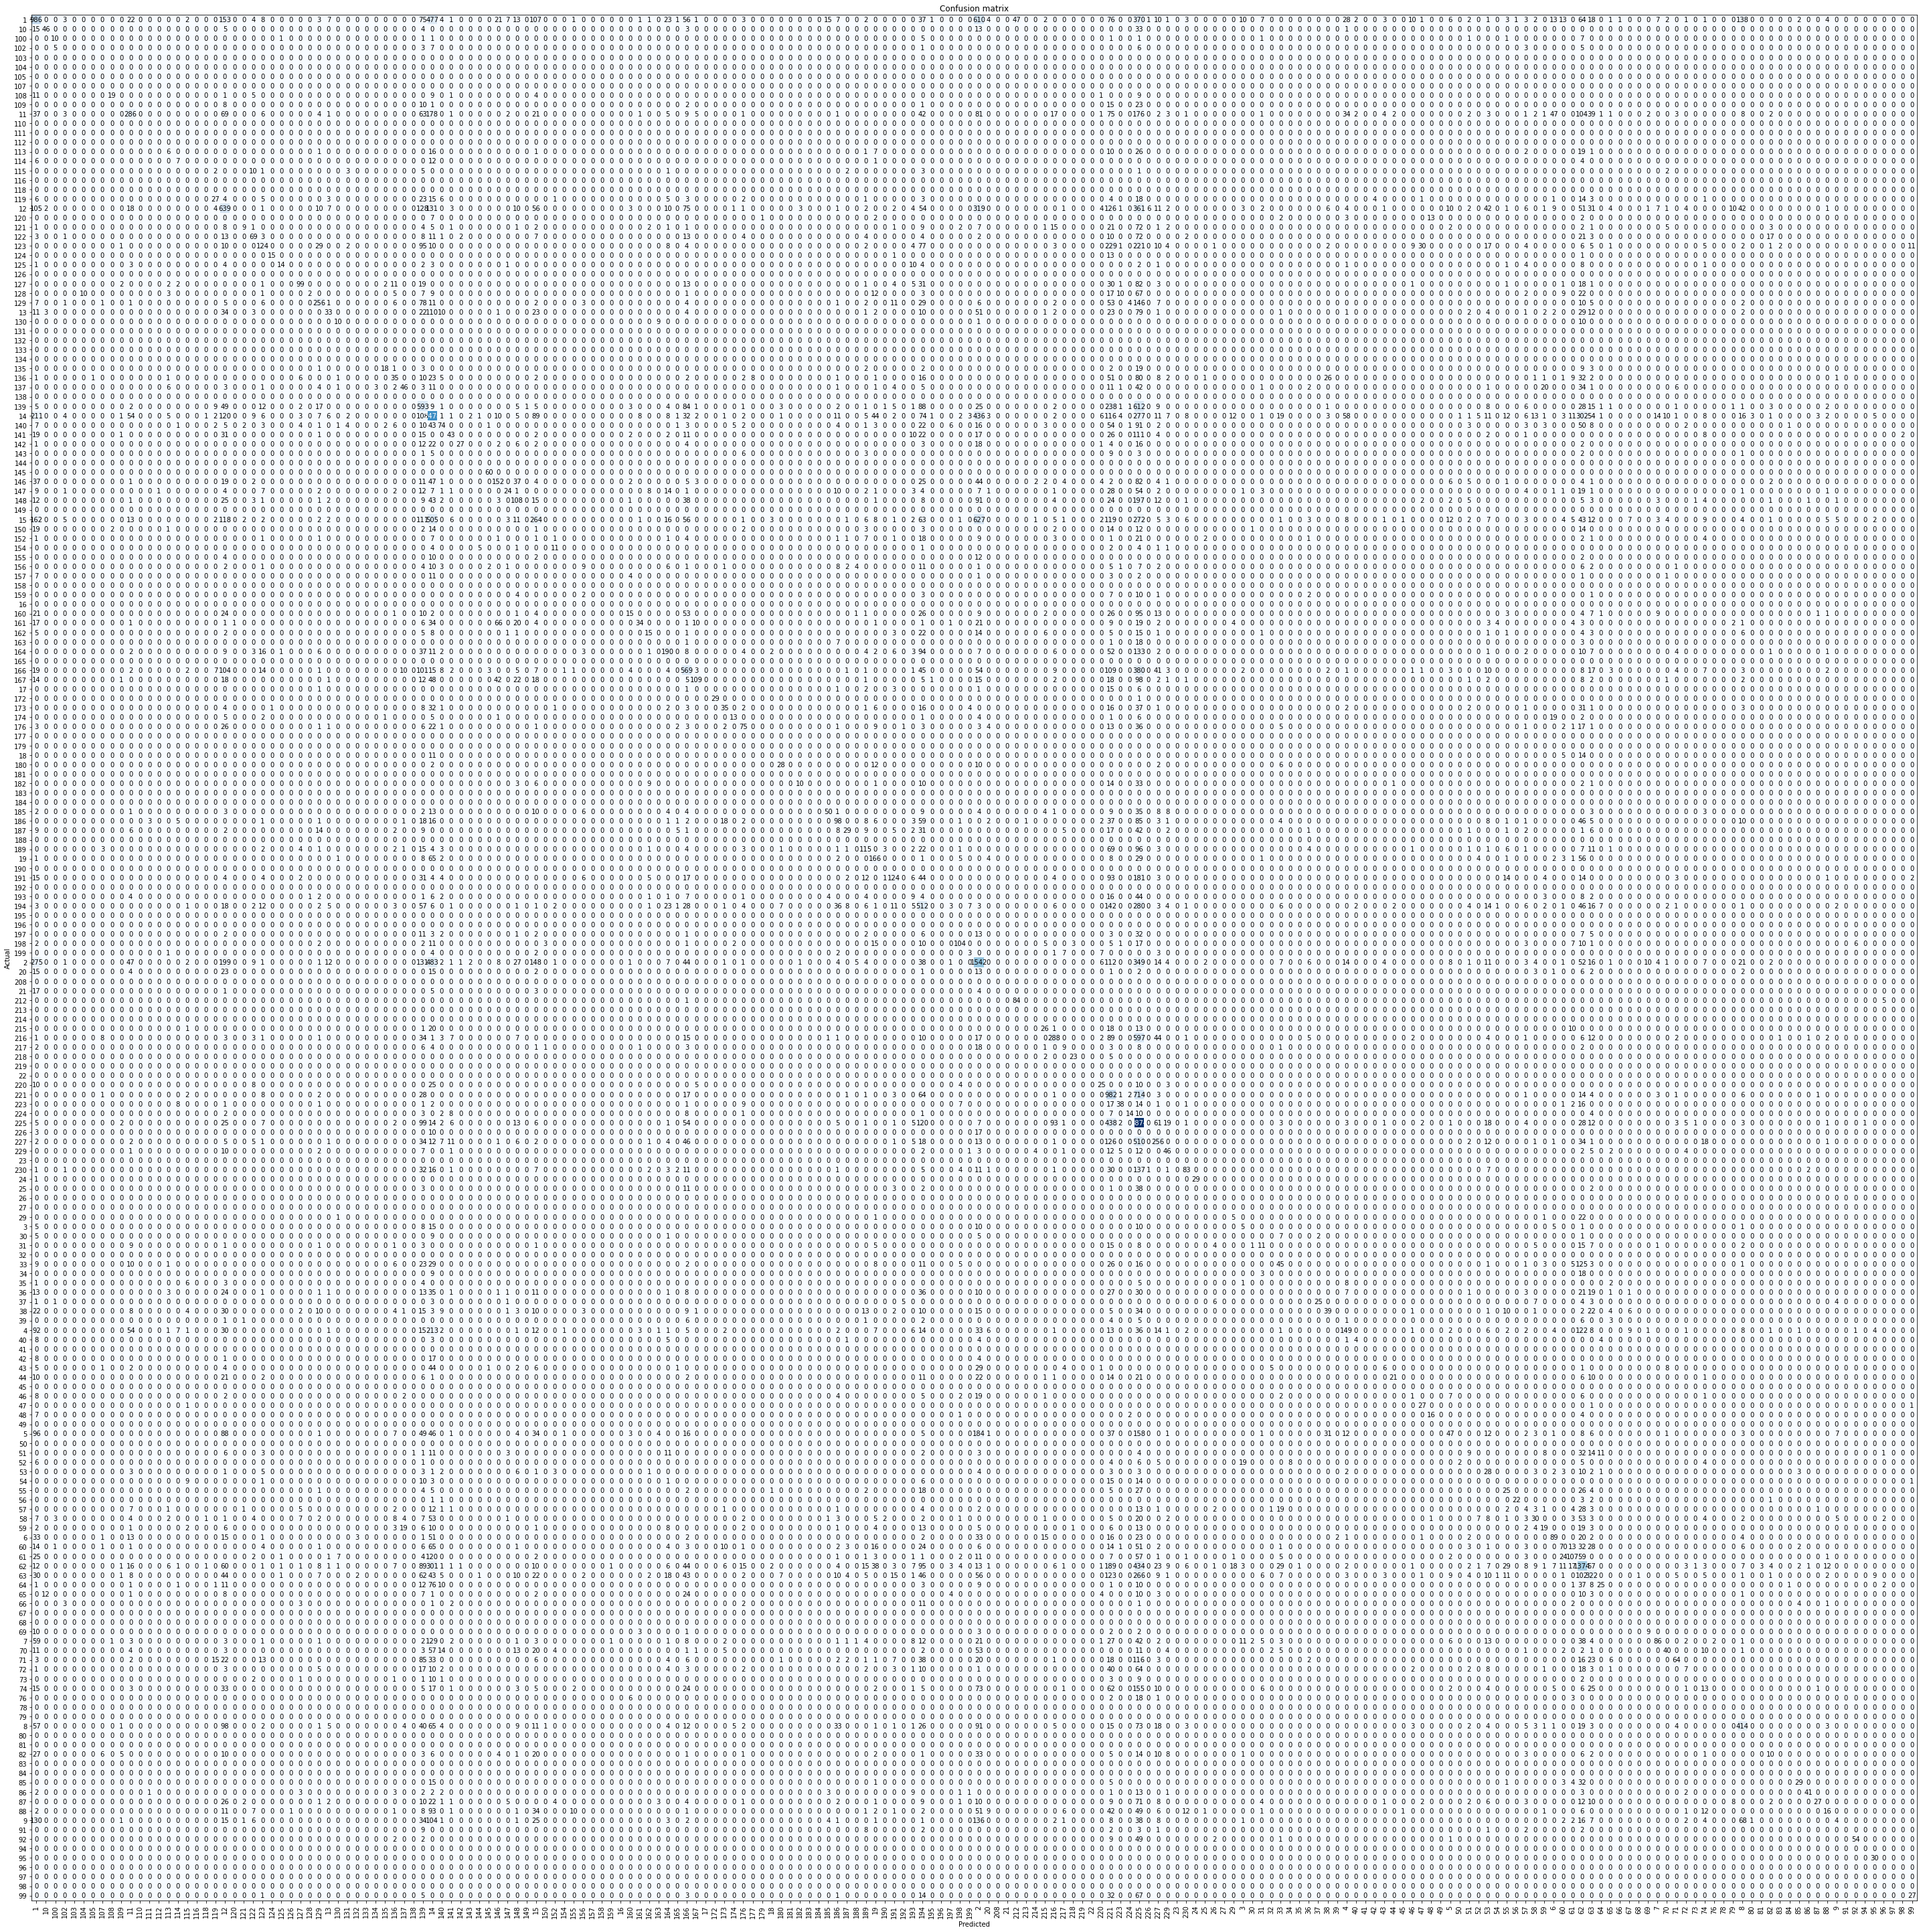

In [19]:
interp.plot_confusion_matrix(figsize=(40, 40))

59326 misclassified samples over 61200 samples in the validation set.


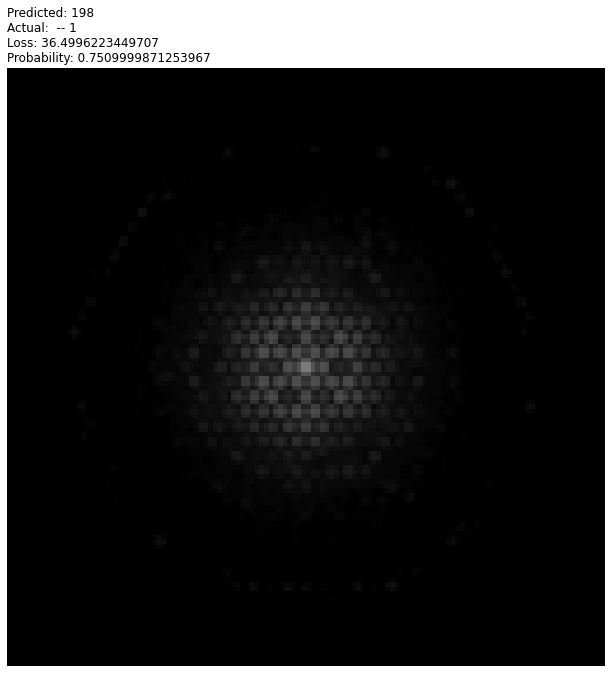

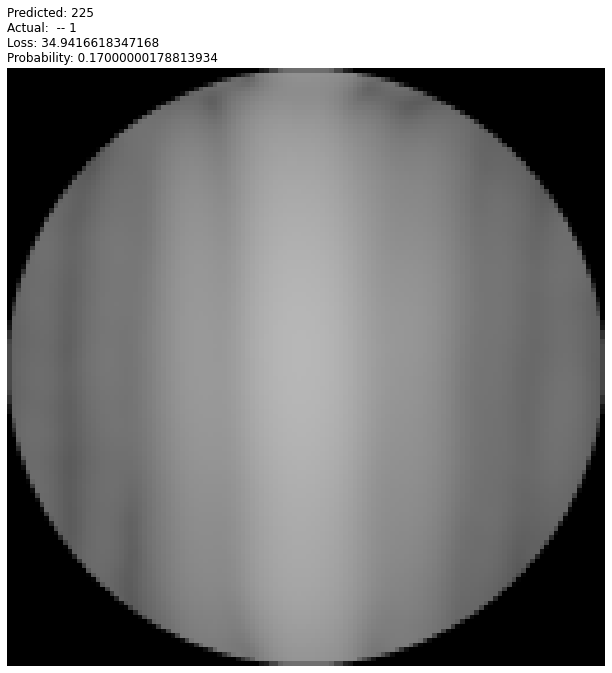

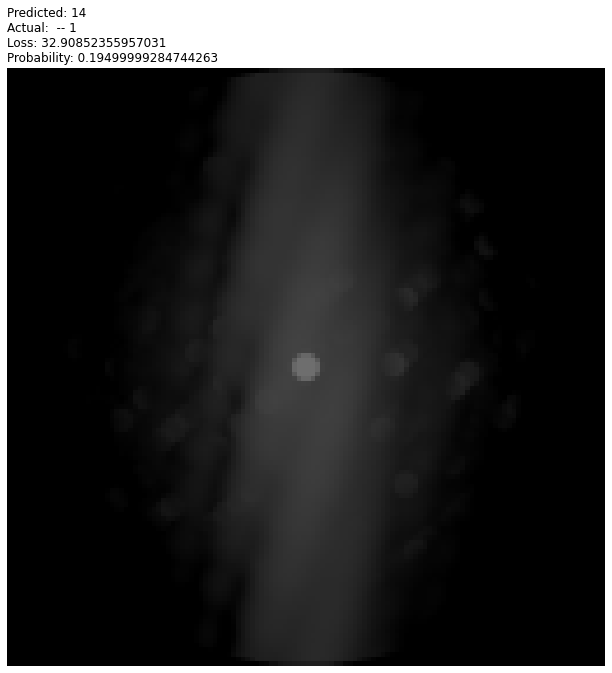

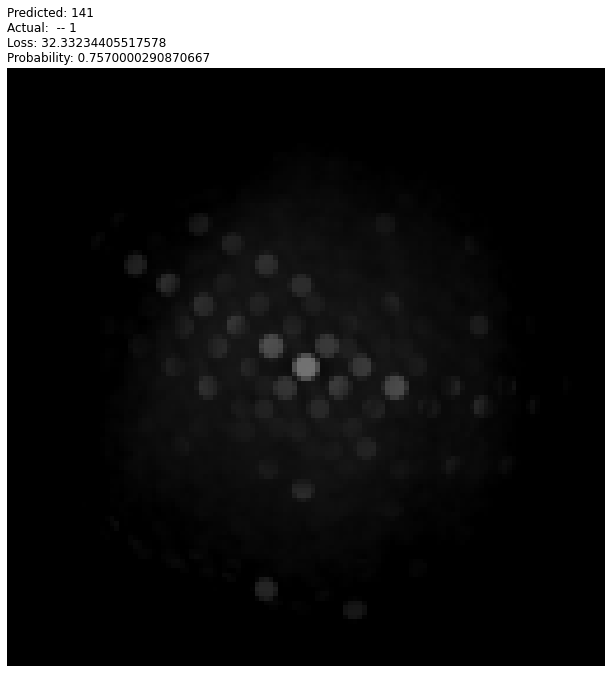

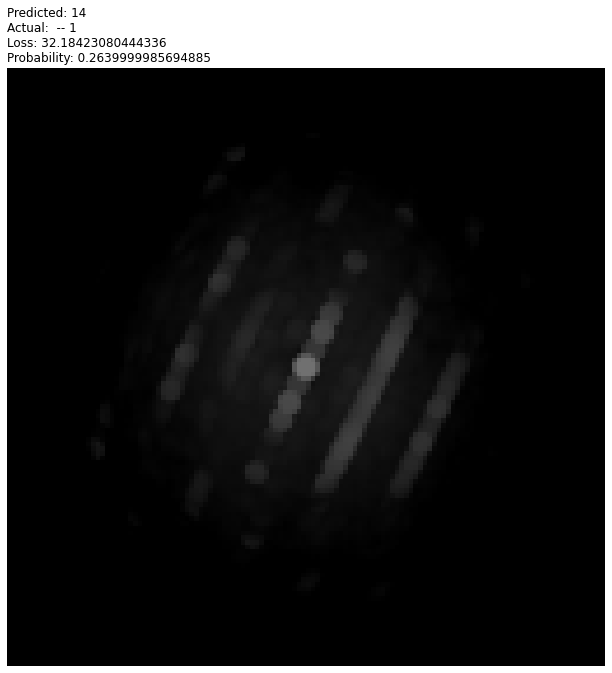

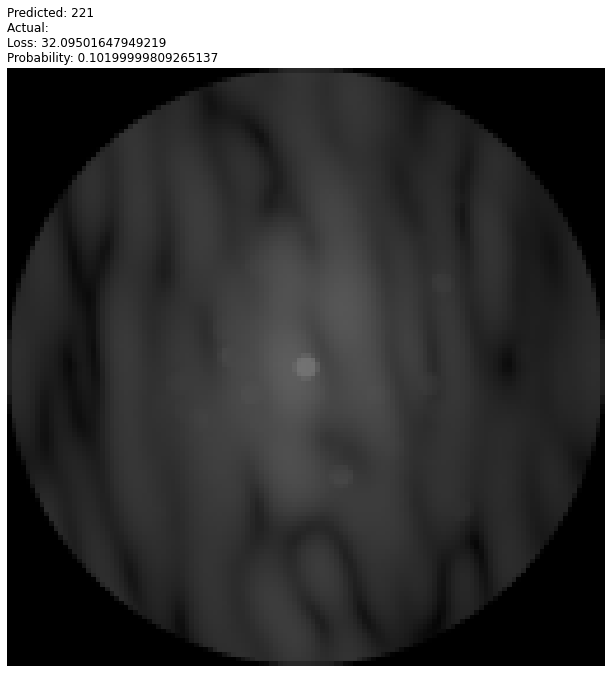

In [9]:
interp.plot_multi_top_losses(6, figsize=(15, 11))

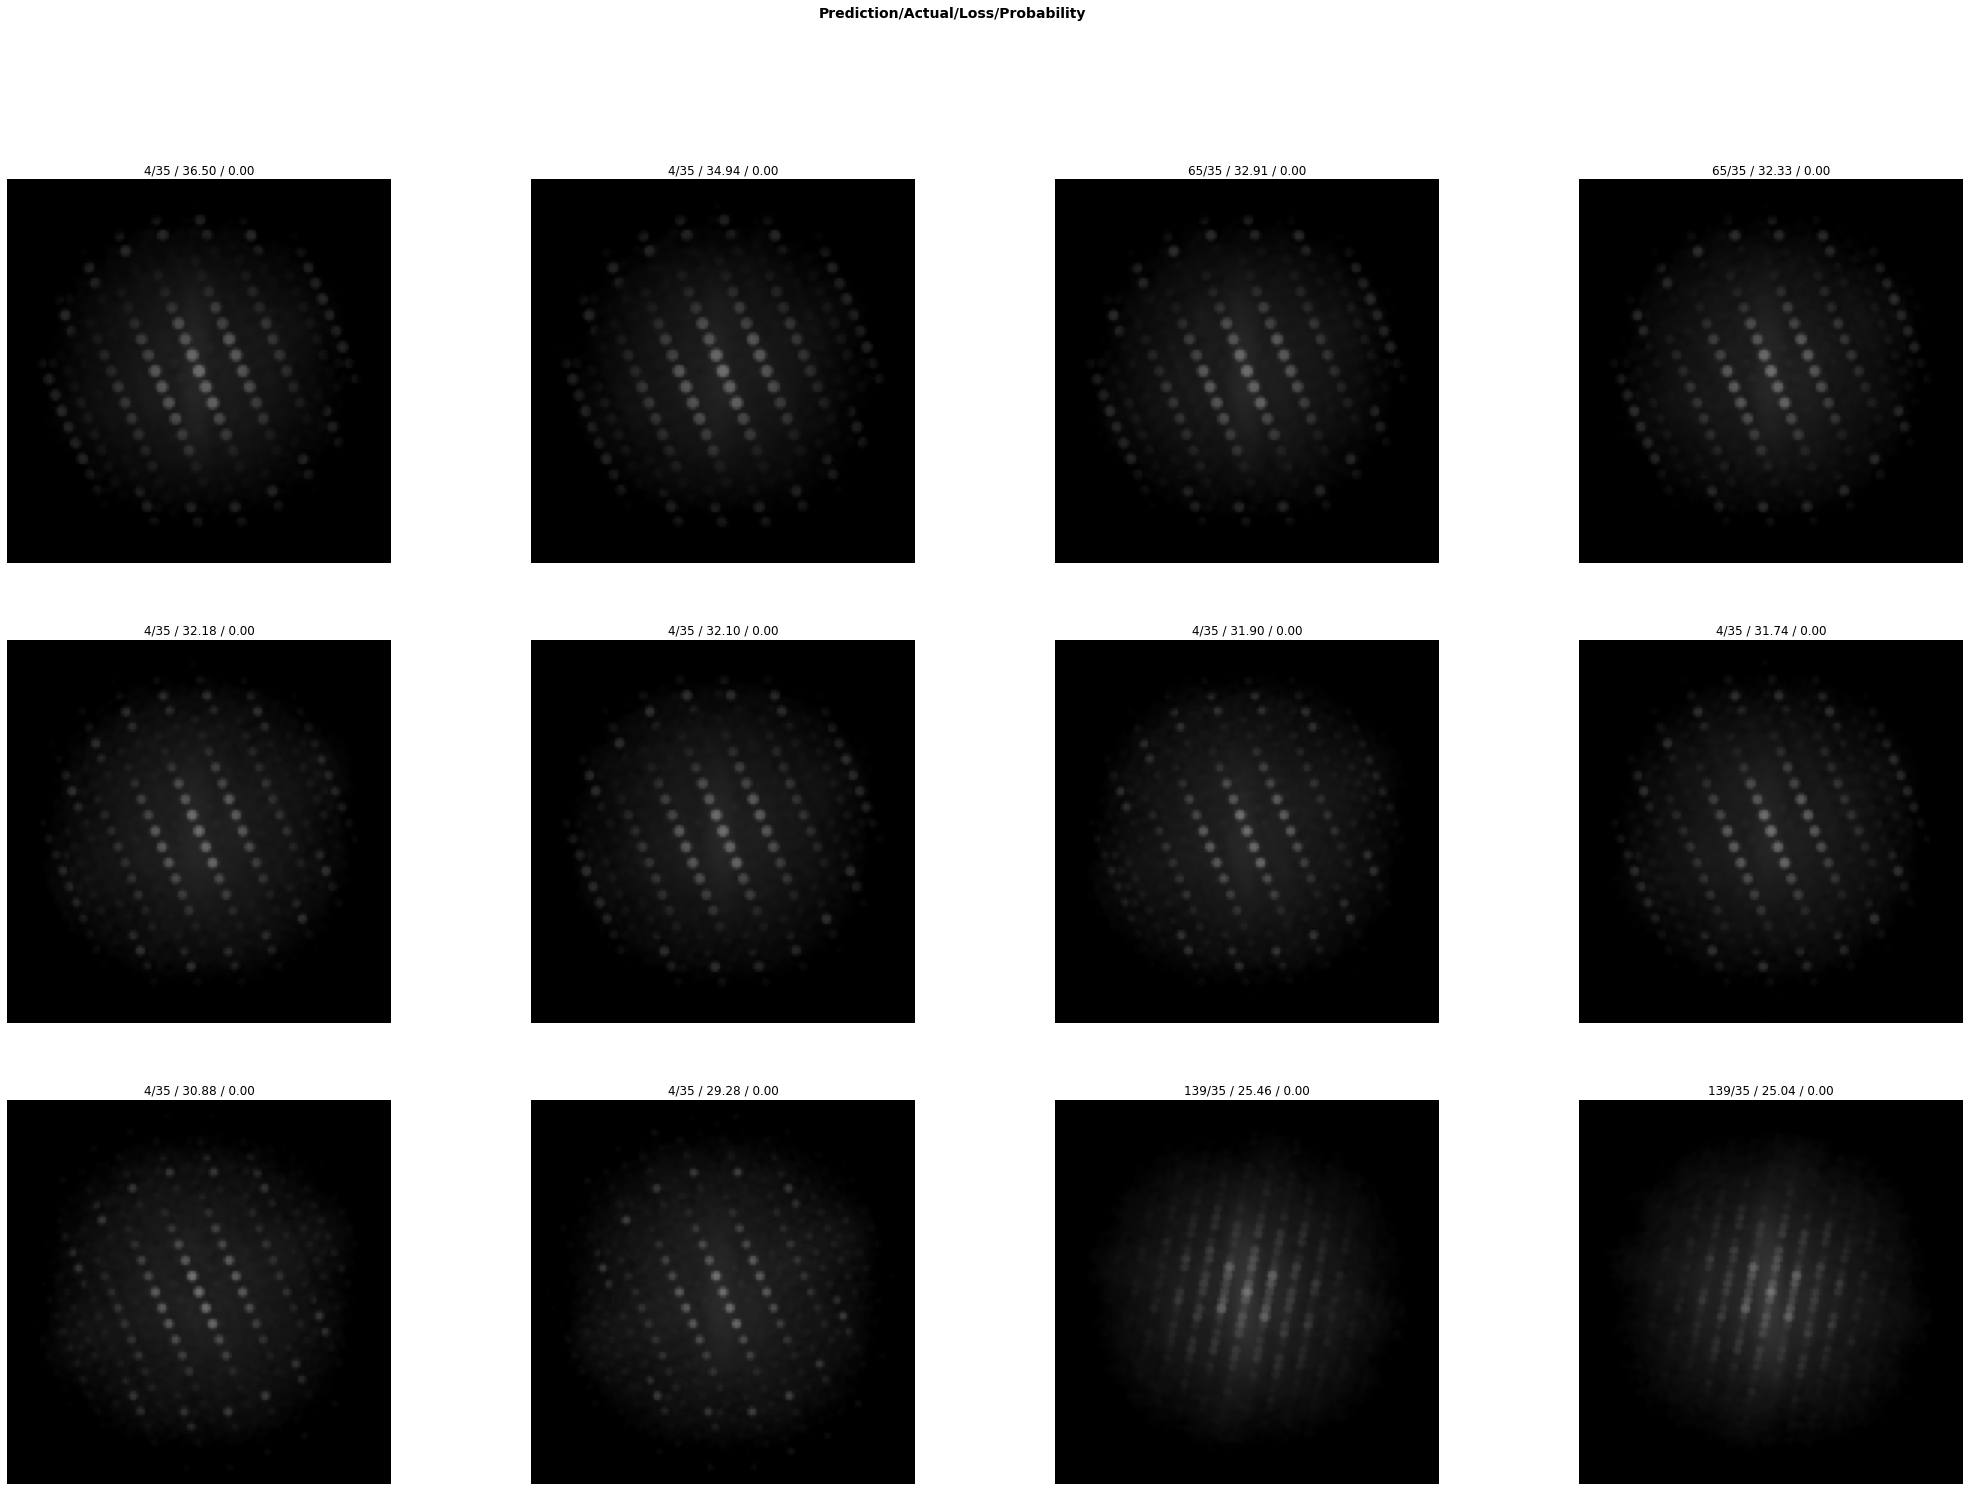

In [12]:
interp.plot_top_losses(12, figsize=(36,24))

In [6]:
img_path = path2/'img9'

tfms = [
    [
        fastai.vision.transform.rotate(p=1., degrees=(0., 360.)),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=500,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet34,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])

# learn2.fit_one_cycle(10, 1e-3)

In [112]:
learn2.fit_one_cycle(40, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.464827,3.271122,0.742614,0.257386,0.538170,06:21
1,2.459774,3.292195,0.743170,0.256830,0.537435,06:21
2,2.456074,3.291150,0.742729,0.257271,0.537516,06:22
3,2.448087,3.278311,0.741650,0.258350,0.536307,06:23
4,2.451558,3.285275,0.741373,0.258627,0.539493,06:23
5,2.436361,3.272480,0.741667,0.258333,0.539118,06:23
6,2.439709,3.282636,0.739216,0.260784,0.539461,06:23
7,2.442643,3.295248,0.746650,0.253350,0.533627,06:23
8,2.428188,3.279875,0.744069,0.255931,0.537435,06:24
9,2.408435,3.261168,0.737484,0.262516,0.545180,06:24


In [113]:
# learn2.save('9_rot_head')

In [114]:
learn2.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


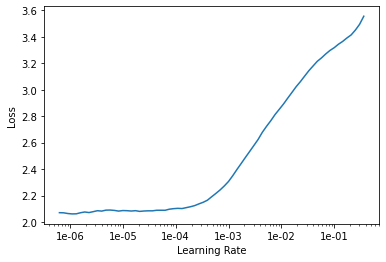

In [115]:
learn2.lr_find()
learn2.recorder.plot()

In [116]:
learn2.fit_one_cycle(30, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.077418,3.262109,0.713529,0.286471,0.561863,08:25
1,2.060443,3.242790,0.712892,0.287108,0.562843,08:26
2,2.060141,3.249856,0.711732,0.288268,0.563758,08:21
3,2.029786,3.231556,0.708497,0.291503,0.565310,08:21
4,2.005754,3.213163,0.705212,0.294788,0.569216,08:19
5,1.980747,3.223387,0.704575,0.295425,0.569118,08:23
6,1.945055,3.219346,0.703693,0.296307,0.570948,08:26
7,1.925069,3.194357,0.701275,0.298725,0.572369,08:21
8,1.897306,3.169749,0.695670,0.304330,0.576389,08:20
9,1.871843,3.190420,0.695278,0.304722,0.577369,08:22


In [118]:
# learn2.save('9_rot_full')

In [7]:
learn2.load('9_rot_full')
None

In [6]:
learn2.fit_one_cycle(1, slice(5e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.596976,3.208964,0.679150,0.320850,0.588807,06:38


In [7]:
p1, p2, p3 = img_path.glob('valid/83_sample_2_5*')
p1, p2, p3

(PosixPath('/home/jin/sandbox/smc_challenge2/images/img9/valid/83_sample_2_5.1.198.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img9/valid/83_sample_2_5.2.198.png'),
 PosixPath('/home/jin/sandbox/smc_challenge2/images/img9/valid/83_sample_2_5.0.198.png'))

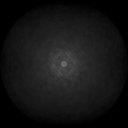

In [117]:
img

In [15]:
grouped_filenames = collections.defaultdict(list)
group_to_spacegroup = {}

for filename in img_path.glob('valid/*'):
    sample, _, space_group, _ = filename.name.split('.')
    grouped_filenames[sample].append(filename.name)
    group_to_spacegroup[sample] = space_group
    
grouped_filenames = dict(grouped_filenames)
print(len(grouped_filenames))

num_correct = 0

for group, filenames in tqdm.tqdm(grouped_filenames.items()):
    space_group = group_to_spacegroup[group]
    
    images = []
    for filename in filenames:
        fullpath = str(img_path/'test'/filename)
        images.append(PIL.Image.open(fullpath).convert('RGB'))
        
    tensors = []
    cuda_tensors = []
    for img in images:
        arr = np.asarray(img) / 255
        
        for angle in range(0, 360, 5):
            M = cv2.getRotationMatrix2D((64, 64), angle=angle, scale=1)
            arr2 = cv2.warpAffine(arr, M, (128, 128))
            
            # PIL and torch disagree about width/height/channel order
            arr2 = np.transpose(arr2, (1, 0, 2))
            arr2 = np.transpose(arr2, (2, 1, 0))
            tsr = torch.from_numpy(arr2.astype(np.float32))

            tensors.append(tsr)
            cuda_tensors.append(tsr.cuda())

    learn2.model.eval()
    with torch.no_grad():
        out = learn2.model(torch.stack(cuda_tensors))
        argmax = F.softmax(out, dim=1).mean(dim=0).argmax()
    
    cat = data2.train_ds.y.classes[argmax]
    if str(cat) == space_group:
        num_correct += 1
        
        # if num_correct % 100 == 0:
        #     print(num_correct)
    
    
print(num_correct, len(grouped_filenames))

  0%|          | 0/18749 [00:00<?, ?it/s]

18749


100%|██████████| 18749/18749 [1:03:17<00:00,  4.94it/s]

9834 18749


In [17]:
9834 / 18749

0.5245079737586005

In [129]:
out = learn2.model(torch.stack(cuda_tensors))

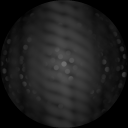

In [163]:
img

In [164]:
cv2

NameError: name 'cv2' is not defined

In [121]:
len(cuda_tensors)

3

In [45]:
str(cat)

'216'

In [16]:
1363 / 20400

0.06681372549019608

In [2]:
img_path = path2/'img9'

tfms = [
    [
        fastai.vision.transform.rotate(p=1., degrees=(0., 360.)),
    ],
    []
]

data2 = (
    fastai.vision.ImageList.from_folder(img_path, extensions='.png')
    .split_by_folder(train='train', valid='valid')
    .label_from_re(r'.*\.(\d{1,3})\.png$')
    .transform(tfms)
    .databunch(
        bs=200,
    )
)

learn2 = None

gc.collect()

learn2 = fastai.vision.cnn_learner(
    data2,
    fastai.vision.models.resnet50,
    metrics=[
        fastai.metrics.error_rate,
        fastai.metrics.accuracy,
        fastai.metrics.top_k_accuracy,
    ])


epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


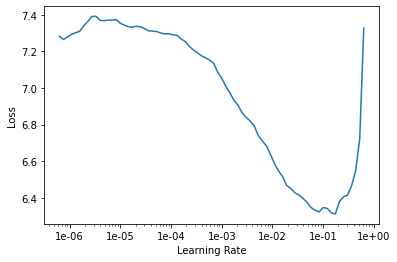

In [207]:
learn2.lr_find()
learn2.recorder.plot()

In [3]:
learn2.fit_one_cycle(50, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,4.026799,4.460130,0.826307,0.173693,0.422255,14:18
1,3.452582,3.633283,0.807320,0.192680,0.460212,14:16
2,3.115523,3.510992,0.783186,0.216814,0.486569,14:16
3,2.901070,3.344712,0.766503,0.233497,0.508611,14:12
4,2.740779,3.295588,0.760539,0.239461,0.524935,14:06
5,2.593716,3.212623,0.744428,0.255572,0.538088,14:09
6,2.483670,3.231337,0.739902,0.260098,0.540931,14:10
7,2.397910,3.162609,0.728758,0.271242,0.548987,14:10
8,2.335804,3.166712,0.725556,0.274444,0.555572,14:11
9,2.242285,3.183397,0.719461,0.280539,0.559167,14:12


In [4]:
# learn2.save('9_50_rot_head')

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


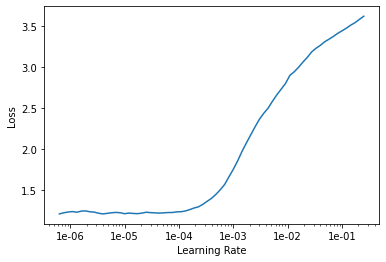

In [5]:
learn2.unfreeze()

learn2.lr_find()
learn2.recorder.plot()

In [ ]:
learn2.load('9_50_rot_head')

In [8]:
learn2.fit_one_cycle(25, slice(5e-5))

learn2.save('9_50_rot_full_25')

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.245093,3.184468,0.643840,0.356160,0.609624,18:11
1,1.229433,3.169820,0.643235,0.356765,0.610507,18:02
2,1.207582,3.174953,0.644199,0.355801,0.608431,18:17
3,1.182313,3.186848,0.642598,0.357402,0.609935,18:05
4,1.190591,3.179806,0.640278,0.359722,0.611356,18:04
5,1.150542,3.166780,0.638840,0.361160,0.611879,18:10
6,1.138063,3.172130,0.631863,0.368137,0.612712,18:11
7,1.073789,3.176240,0.634265,0.365735,0.611699,18:21
8,1.072328,3.215555,0.632369,0.367631,0.614608,18:14
9,1.019270,3.196651,0.629608,0.370392,0.613709,18:15
